In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\mural\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [14]:
def load_data():
    
    dataframes = [pd.read_csv(str(i) +'year'+'.csv') for i in range(1,6)]
    
    return dataframes

In [15]:
#setting new headers.
def set_new_headers(dataframes):
    cols = ['X' + str(i+1) for i in range(len(dataframes[0].columns)-1)]
    cols.append('Y')
    for df in dataframes:
        df.columns = cols

In [16]:
dataframes = load_data()

C:\Users\mural\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3326: DtypeWarning: Columns (0,1,2,5,6,8,9,10,13,17,21,23,24,28,34,35,37,47,50,54,56,58) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\mural\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3326: DtypeWarning: Columns (14,23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\mural\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3326: DtypeWarning: Columns (0,1,2,5,6,7,9,10,13,14,15,16,17,21,23,24,25,28,33,34,35,37,47,49,50,56,58) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [17]:
set_new_headers(dataframes)

In [18]:
dataframes[0].head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X56,X57,X58,X59,X60,X61,X62,X63,X64,Y
0,0.20055,0.37951,0.39641,2.0472,32.351,0.38825,0.24976,1.3305,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.416,5.1372,82.658,4.4158,7.4277,0
1,0.20912,0.49988,0.47225,1.9447,14.786,0,0.25834,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0,4.1486,3.2732,107.350,3.4,60.987,0
2,0.24866,0.69592,0.26713,1.5548,-1.1523,0,0.30906,0.43695,1.309,0.30408,...,0.241140,0.81774,0.76599,0.69484,4.9909,3.951,134.270,2.7185,5.2078,0
3,0.081483,0.30734,0.45879,2.4928,51.952,0.14988,0.092704,1.8661,1.0571,0.57353,...,0.054015,0.14207,0.94598,0,4.5746,3.6147,86.435,4.2228,5.5497,0
4,0.18732,0.61323,0.2296,1.4063,-7.3128,0.18732,0.18732,0.6307,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.12444,6.3985,4.3158,127.210,2.8692,7.898,0


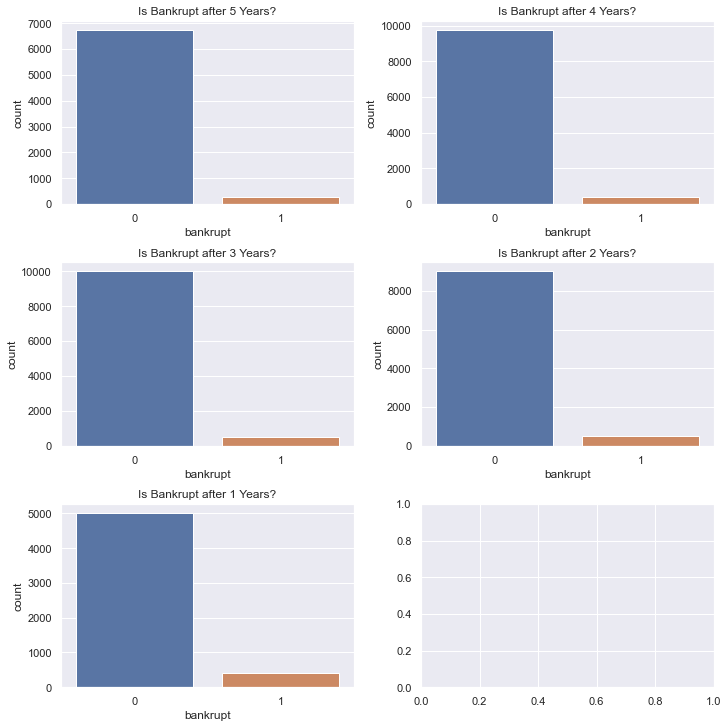

In [61]:
#plotting the class variable.
fig, axs = plt.subplots(nrows=3, ncols=2,
                        figsize=(10, 10), constrained_layout=True)

j = 5
for i in range(0,5):
    row = i//2
    pos = i % 2
    sns.countplot(dataframes[i]['Y'], 
                  ax = axs[row][pos]).set(title = 'Is Bankrupt after ' + str(j)+ ' Years?',
                                         xlabel = 'bankrupt',
                                         ylabel = 'count'
                                         )
    j-=1
    

* The dataset is highly imbalanced. This magnitude of imbalance will not help in training the model.

In [71]:
#checking the datatypes.
for i in range(0,5):
    
    dataframes[i].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7012 entries, 0 to 7011
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      7012 non-null   object 
 1   X2      7012 non-null   object 
 2   X3      7012 non-null   object 
 3   X4      7012 non-null   object 
 4   X5      7012 non-null   object 
 5   X6      7012 non-null   object 
 6   X7      7012 non-null   object 
 7   X8      7012 non-null   object 
 8   X9      7012 non-null   object 
 9   X10     7012 non-null   object 
 10  X11     7012 non-null   object 
 11  X12     7012 non-null   object 
 12  X13     7012 non-null   float64
 13  X14     7012 non-null   object 
 14  X15     7012 non-null   object 
 15  X16     7012 non-null   object 
 16  X17     7012 non-null   object 
 17  X18     7012 non-null   object 
 18  X19     7012 non-null   float64
 19  X20     7012 non-null   float64
 20  X21     7012 non-null   object 
 21  X22     7012 non-null   object 
 22  

In [70]:
dataframes[0]['X45'][6758]

'?'

In [73]:
dataframes[0][dataframes[0]['X45'] == '?']

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X56,X57,X58,X59,X60,X61,X62,X63,X64,Y
40,0.011834,0.088476,0.025515,1.2884,91.798,-0.19522,0.011834,10.302,1.0994,0.91152,...,0.090390,0.012982,0.90961,0,?,3.2969,239.36000,1.5249,0.15227,0
165,0.45732,0.35397,0.28859,1.8586,52.396,0,0.57915,1.8251,2.5404,0.64603,...,0.224500,0.7079,0.77307,0,?,5.9536,48.29100,7.5584,6.7691,0
177,-0.004889,0.79871,0.94984,?,114.56,-0.025845,0.010138,0.10222,1.0136,0.08164,...,0.013388,-0.059879,0.98661,9.7833,?,3.1969,0.00000,?,60.401,0
246,0.30993,1.0714,0.25842,1.5621,26.271,0.10989,0.3431,-0.12325,0.91754,-0.13205,...,-0.089876,-2.3471,1.08990,-4.6317,?,4.2371,59.67300,6.1166,9.9795,0
279,0.035972,0,1,?,1560.2,-0.31137,0.035972,?,0.27564,1,...,-2.627900,0.035972,3.62790,0,?,0.086325,0.00000,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6890,-1.3727,1.9905,-1.0624,0.46628,-7.8927,0,-1.3727,-0.49762,48.005,-0.99052,...,-0.009713,1.3859,1.00730,0,?,63.795,15.13500,24.117,668.09,1
6950,0.005074,0.36178,0.63822,2.7641,328.72,0.005074,0.005074,1.7641,1.041,0.63822,...,0.039408,0.00795,0.96059,0,?,1.6321,181.49000,2.0112,?,1
6987,0.11563,0.20256,0.46197,4.3062,35.509,0,0.11563,3.9369,4.8326,0.79746,...,0.026129,0.14499,0.97615,0,?,8.8963,10.55300,34.586,12.126,1
7000,-0.000153,0.50582,-0.42127,0.15367,-883.03,-0.000153,-0.004183,0.45122,0.91488,0.22824,...,-0.093040,-0.000669,1.09300,0.035313,?,2.2655,1094.00000,0.33365,0.17983,1


### Observations:
1. According the info() function's output, there are zero null values in the dataset. But after observing the data in Excel, null values in the dataset are represented with '?'. 
2. Some of the columns in the dataset are of type object.

In [75]:
#replacing the '?' with NaN

for df in dataframes:
    df.replace('?', np.NaN, inplace = True)

In [76]:
dataframes[0].isnull().sum()

X1      3
X2      3
X3      3
X4     30
X5      8
       ..
X61    22
X62     0
X63    30
X64    34
Y       0
Length: 65, dtype: int64

1. Now, we can see the count of null values in the dataframe.

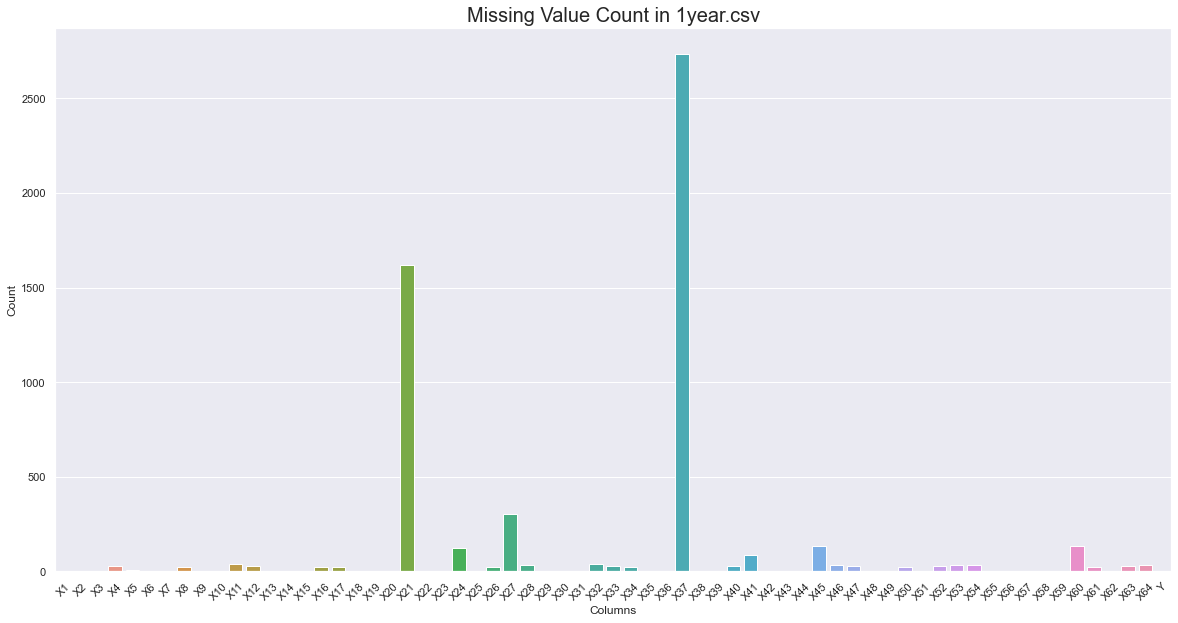

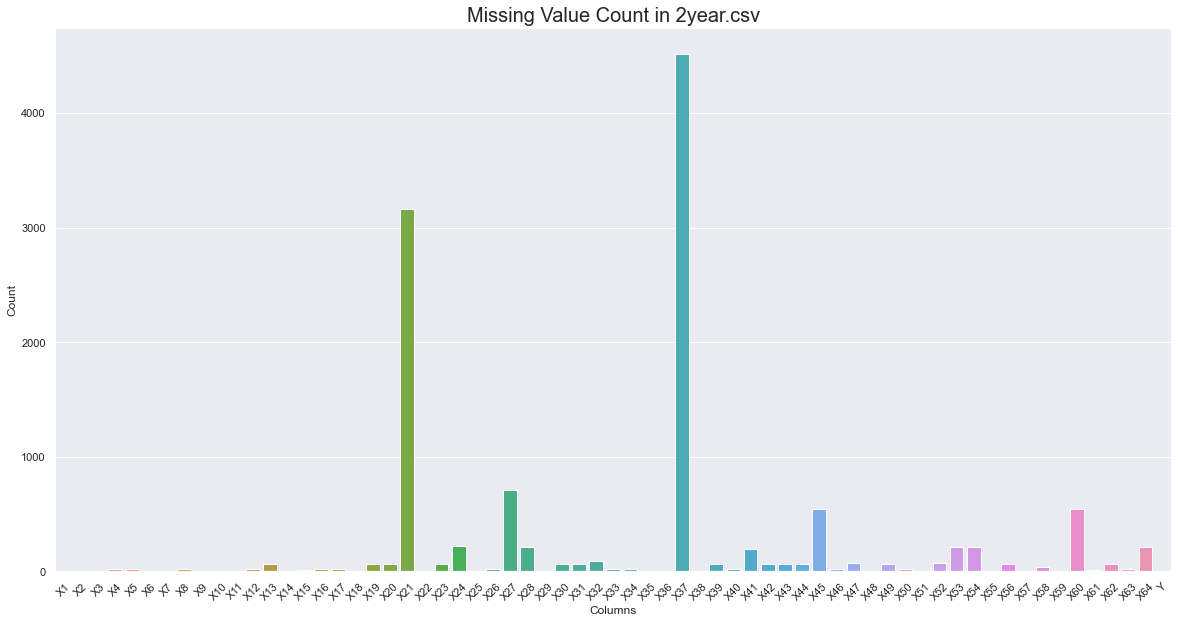

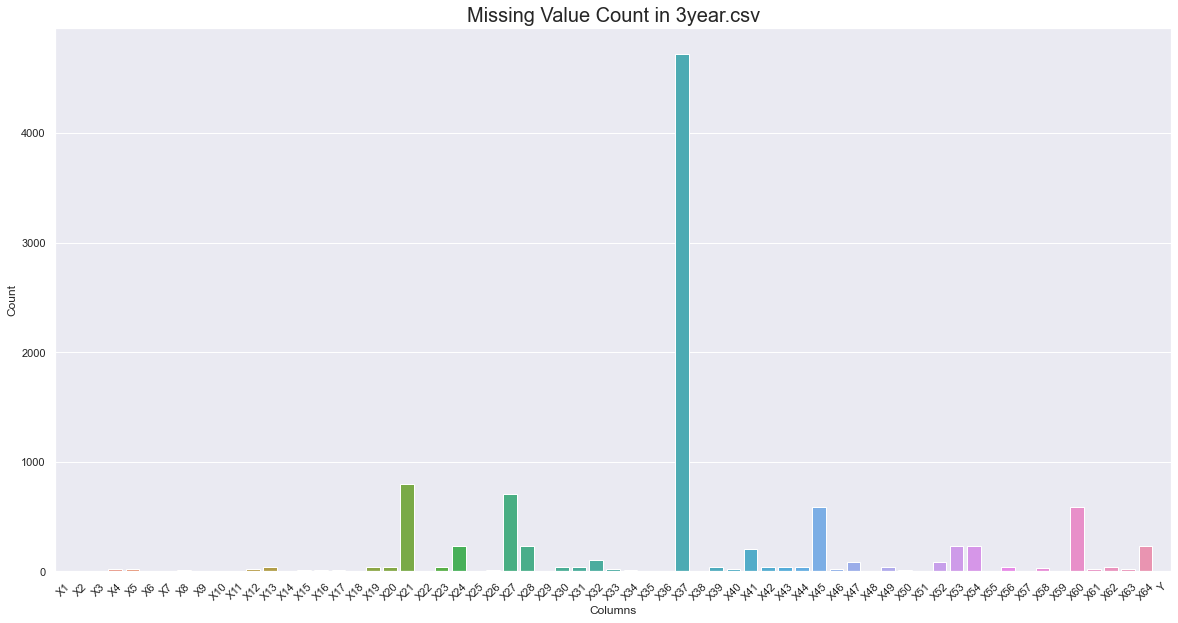

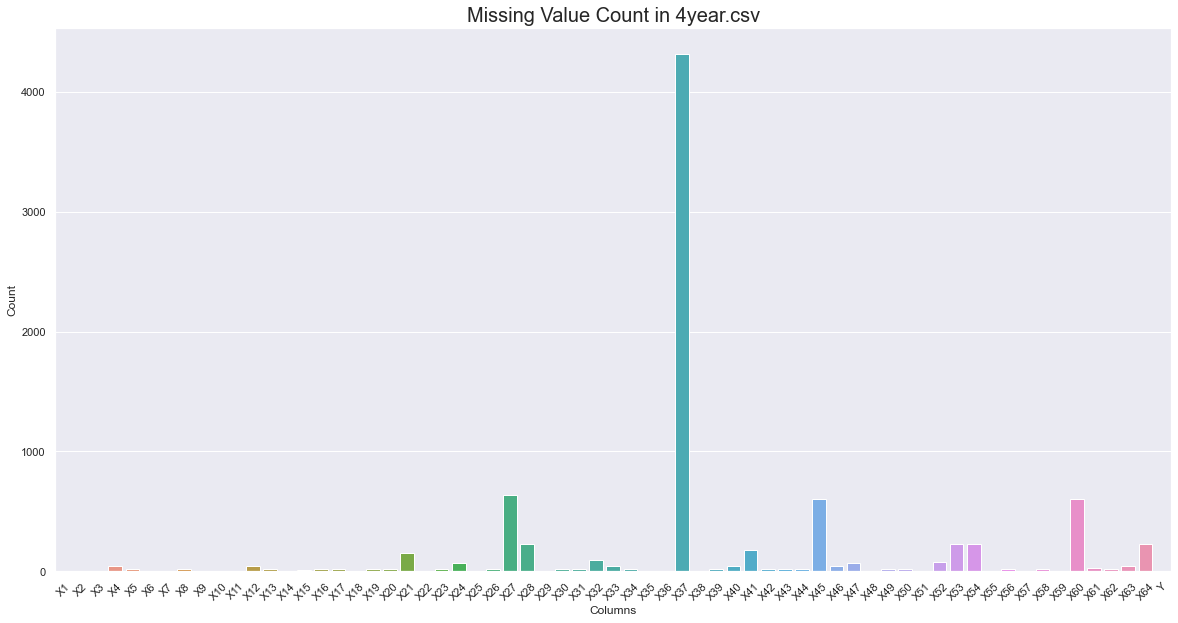

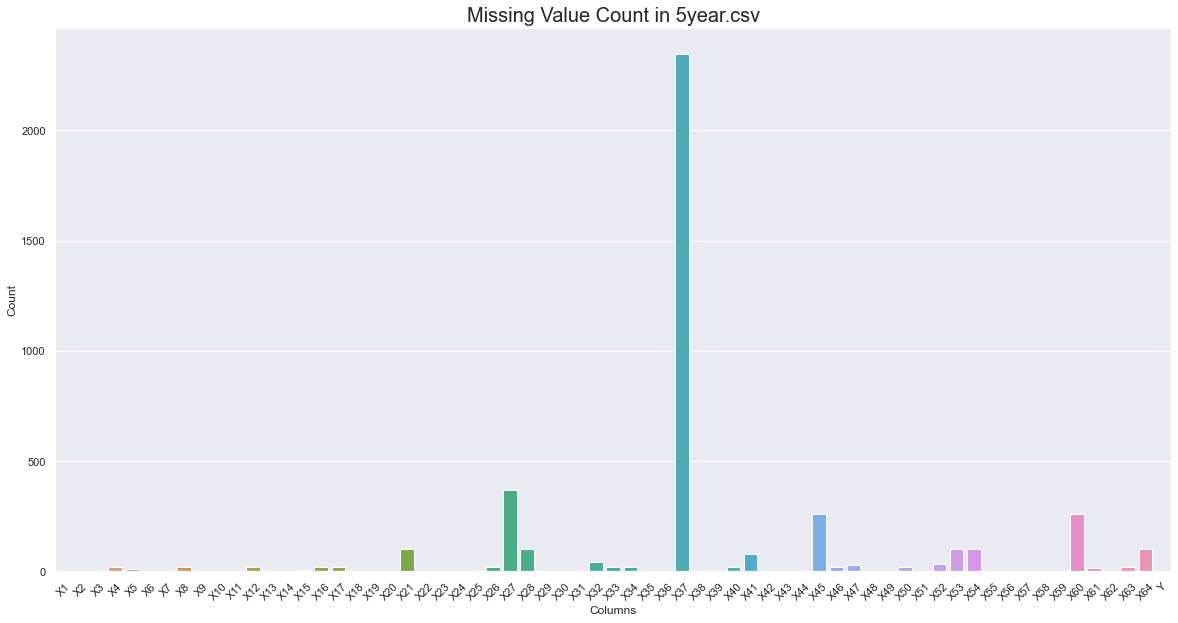

In [97]:
#plot contianing Missing value count in the data for each feature.
for i in range(0,5):
    fig = plt.figure(figsize = (20,10))
    sns.barplot(x = list(dataframes[i].isnull().sum().index) , y = list(dataframes[i].isnull().sum().values))
    plt.title('Missing Value Count in '+  str(i + 1) + 'year.csv', size = 20)
    plt.ylabel('Count')
    plt.xlabel('Columns')
    plt.xticks(rotation = '45')
    plt.show()

1. Although Most of the features have missing values, Feature 'X37' has the most number of missing values.
2. Missing values here cannot be dropped because the total percentage of number of rows containing missing values is very high. Impuation should be done.

In [100]:
# Converting all the columns in all the dataframes to float except 'Y' to maintain Consistency.

for df in dataframes:
    for column in df.columns[:-1]:
        df[column] = df[column].astype('float64')

In [101]:
for df in dataframes:
    df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7012 entries, 0 to 7011
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      7009 non-null   float64
 1   X2      7009 non-null   float64
 2   X3      7009 non-null   float64
 3   X4      6982 non-null   float64
 4   X5      7004 non-null   float64
 5   X6      7009 non-null   float64
 6   X7      7009 non-null   float64
 7   X8      6987 non-null   float64
 8   X9      7011 non-null   float64
 9   X10     7009 non-null   float64
 10  X11     6974 non-null   float64
 11  X12     6982 non-null   float64
 12  X13     7012 non-null   float64
 13  X14     7009 non-null   float64
 14  X15     7010 non-null   float64
 15  X16     6987 non-null   float64
 16  X17     6987 non-null   float64
 17  X18     7009 non-null   float64
 18  X19     7012 non-null   float64
 19  X20     7012 non-null   float64
 20  X21     5393 non-null   float64
 21  X22     7009 non-null   float64
 22  

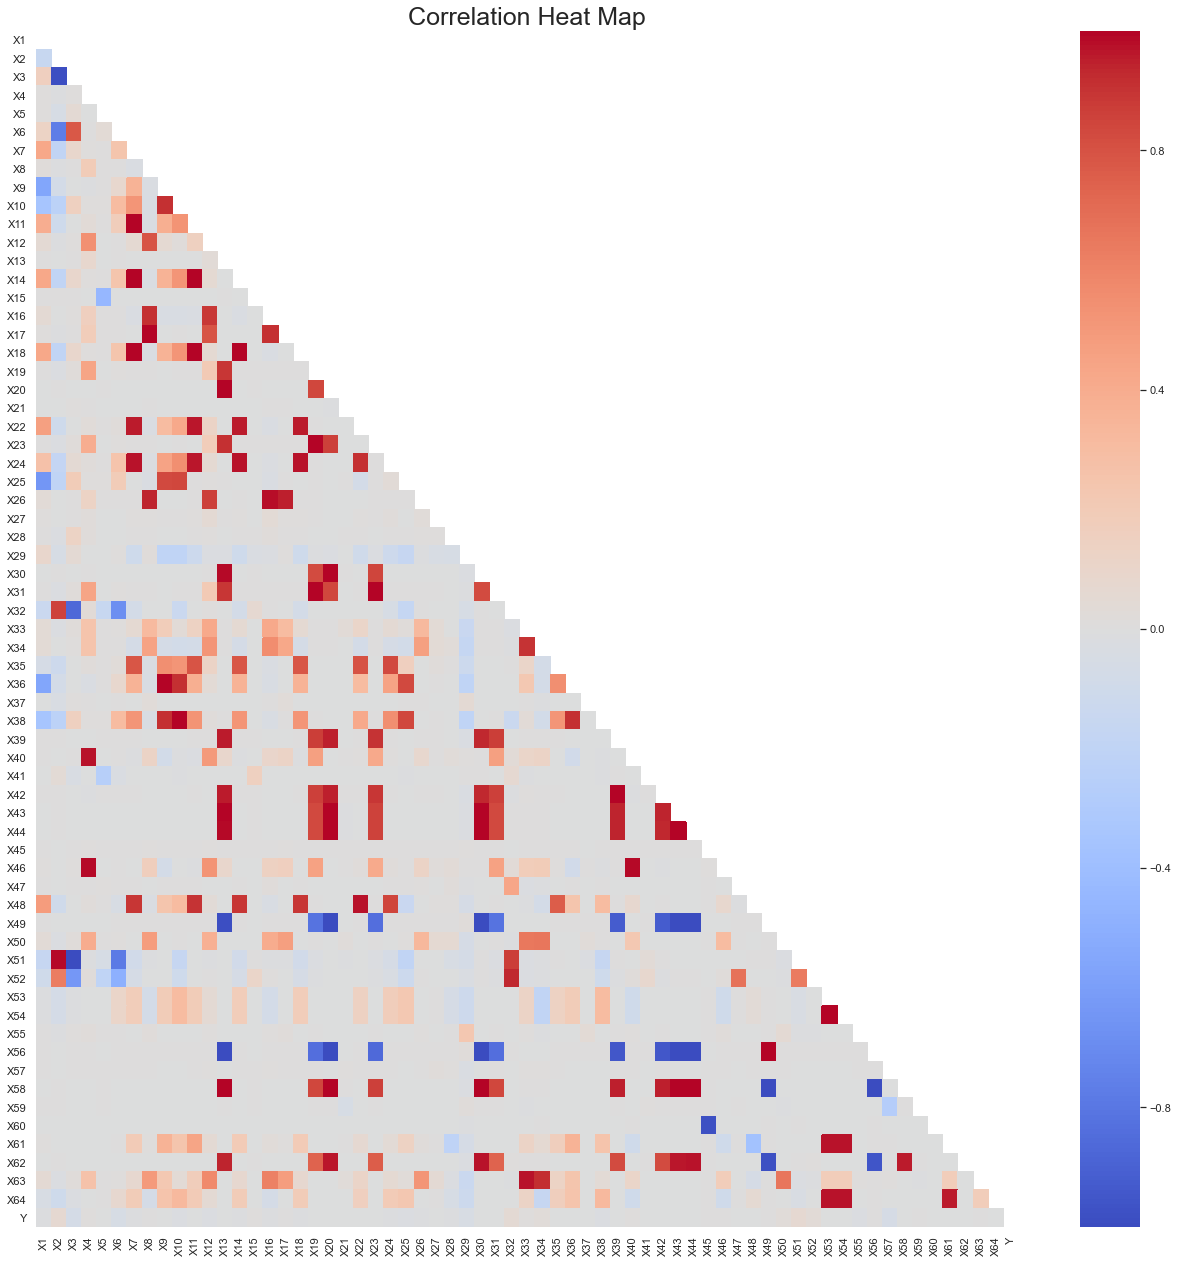

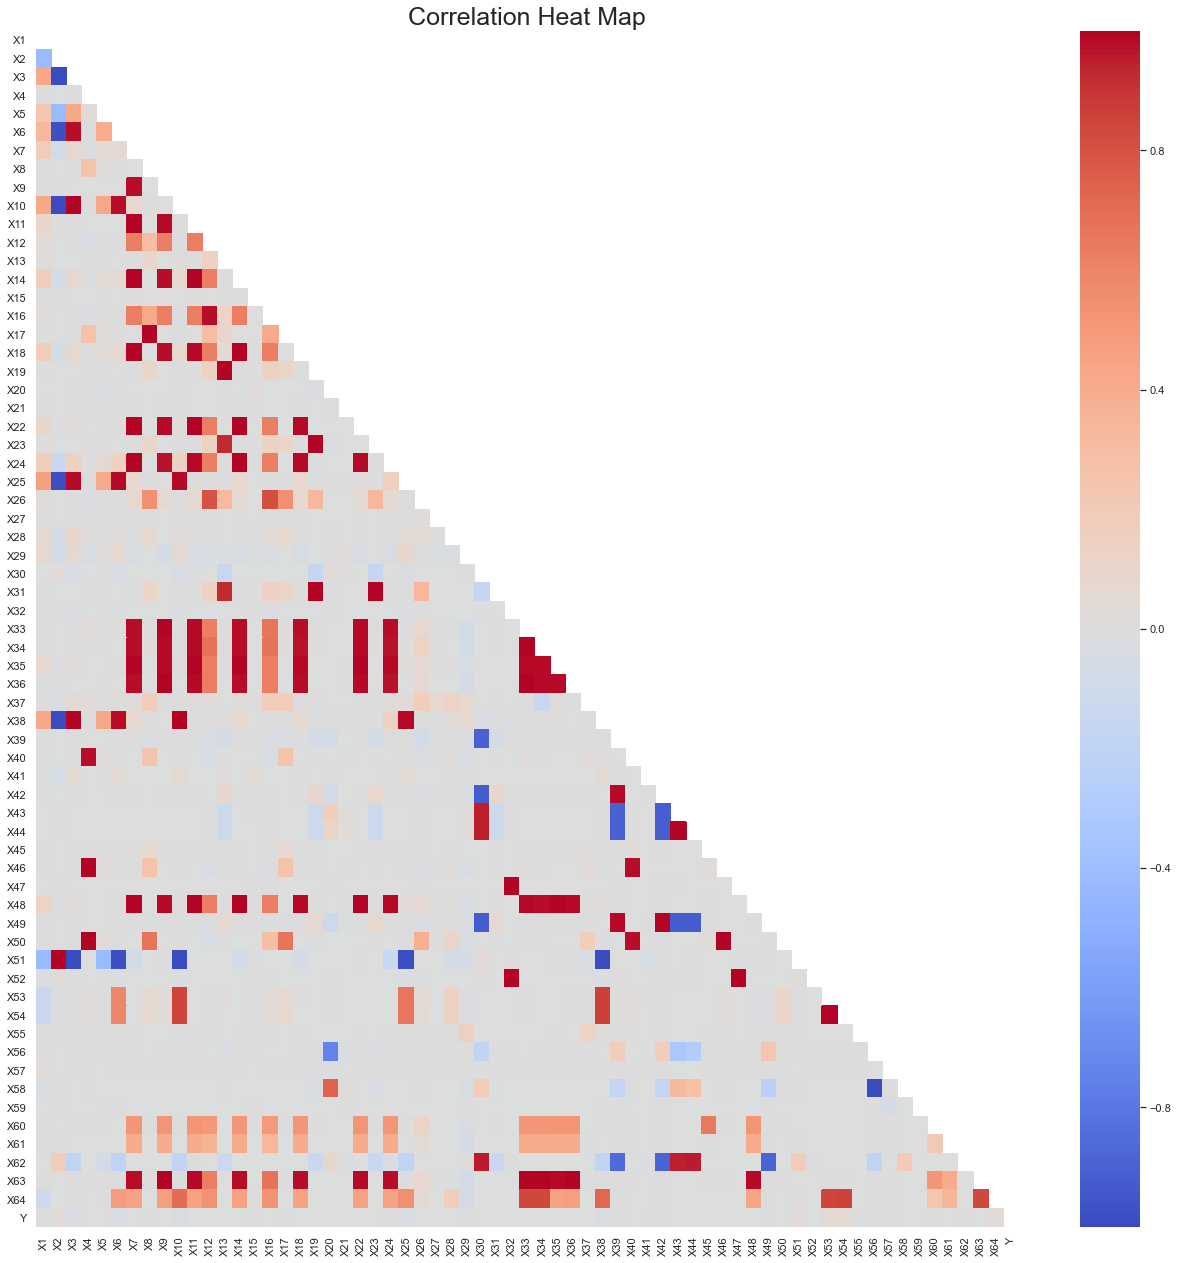

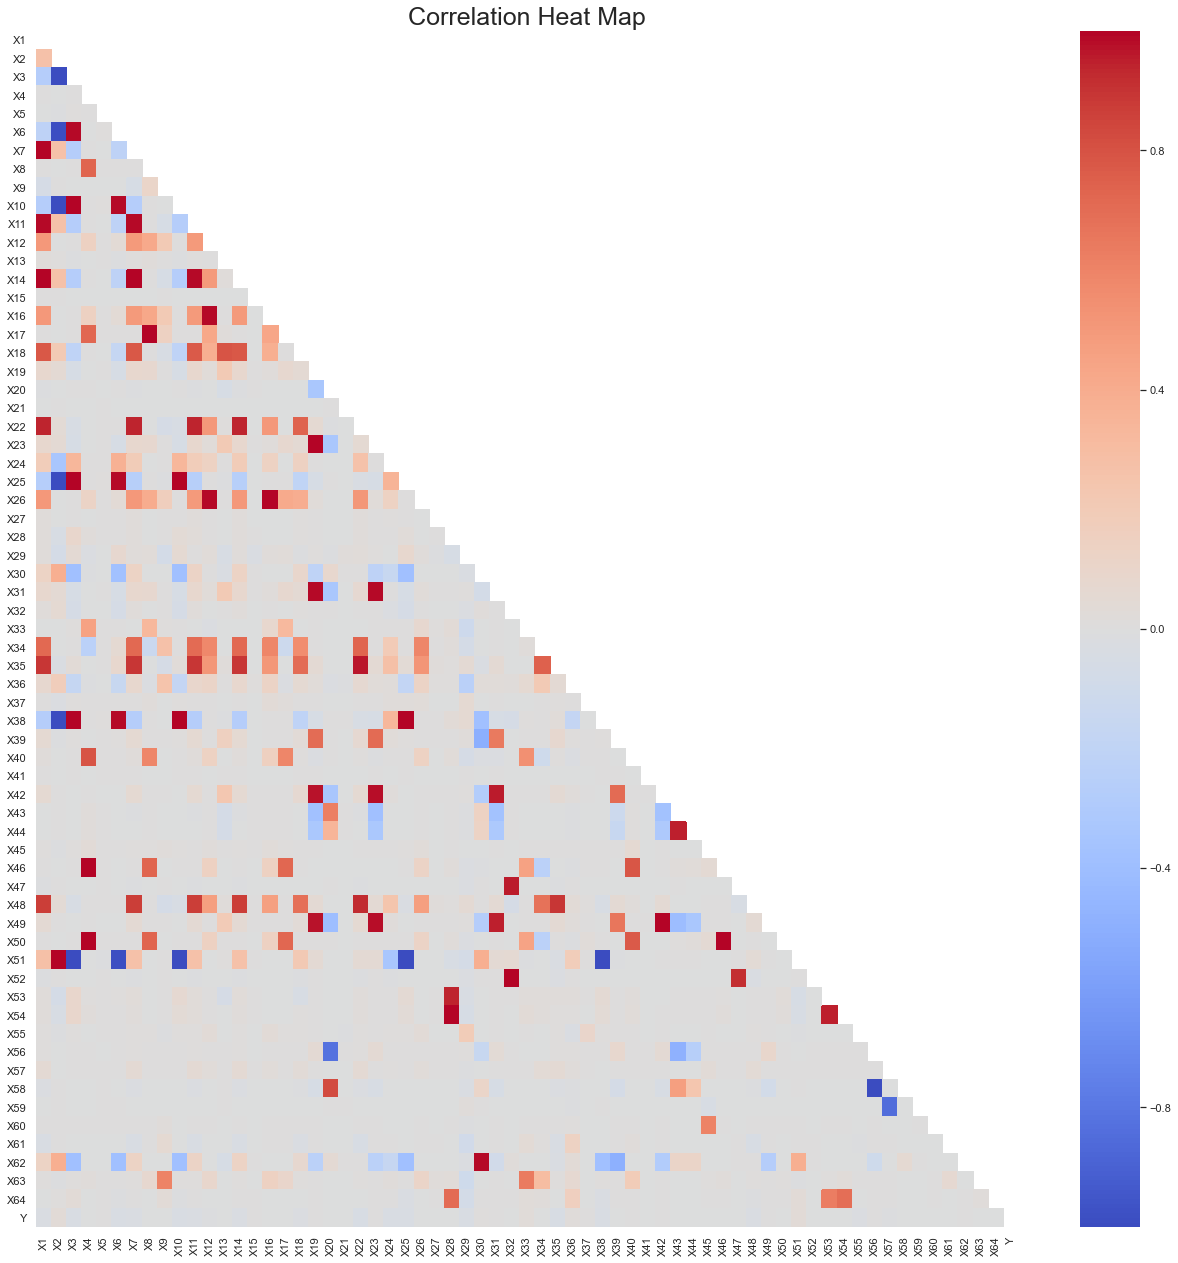

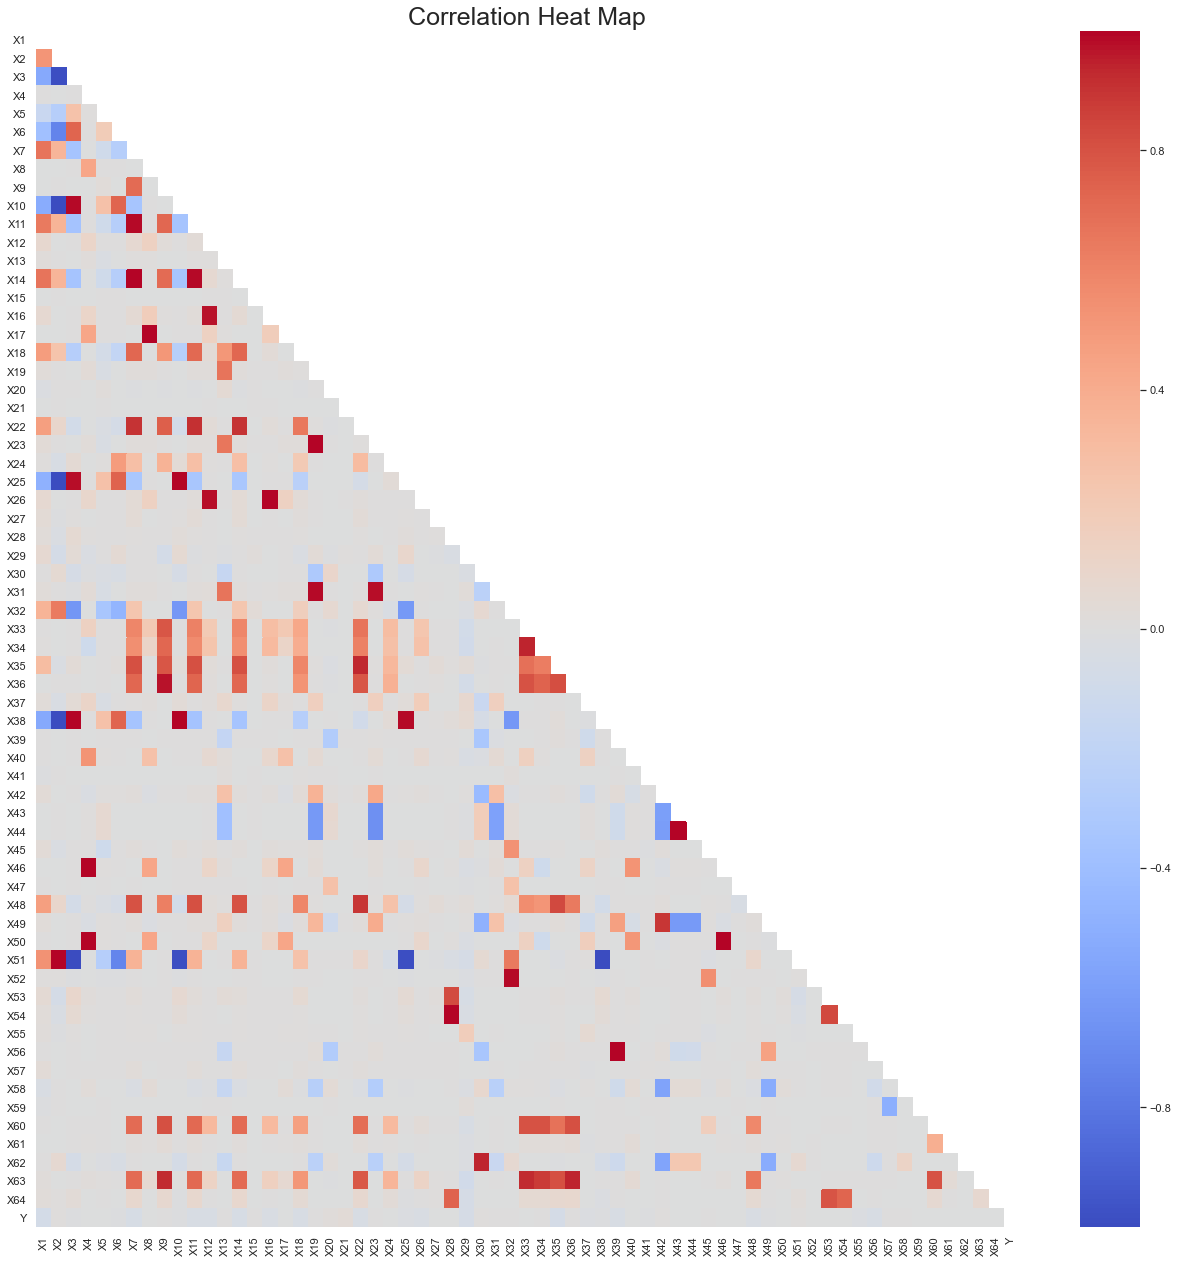

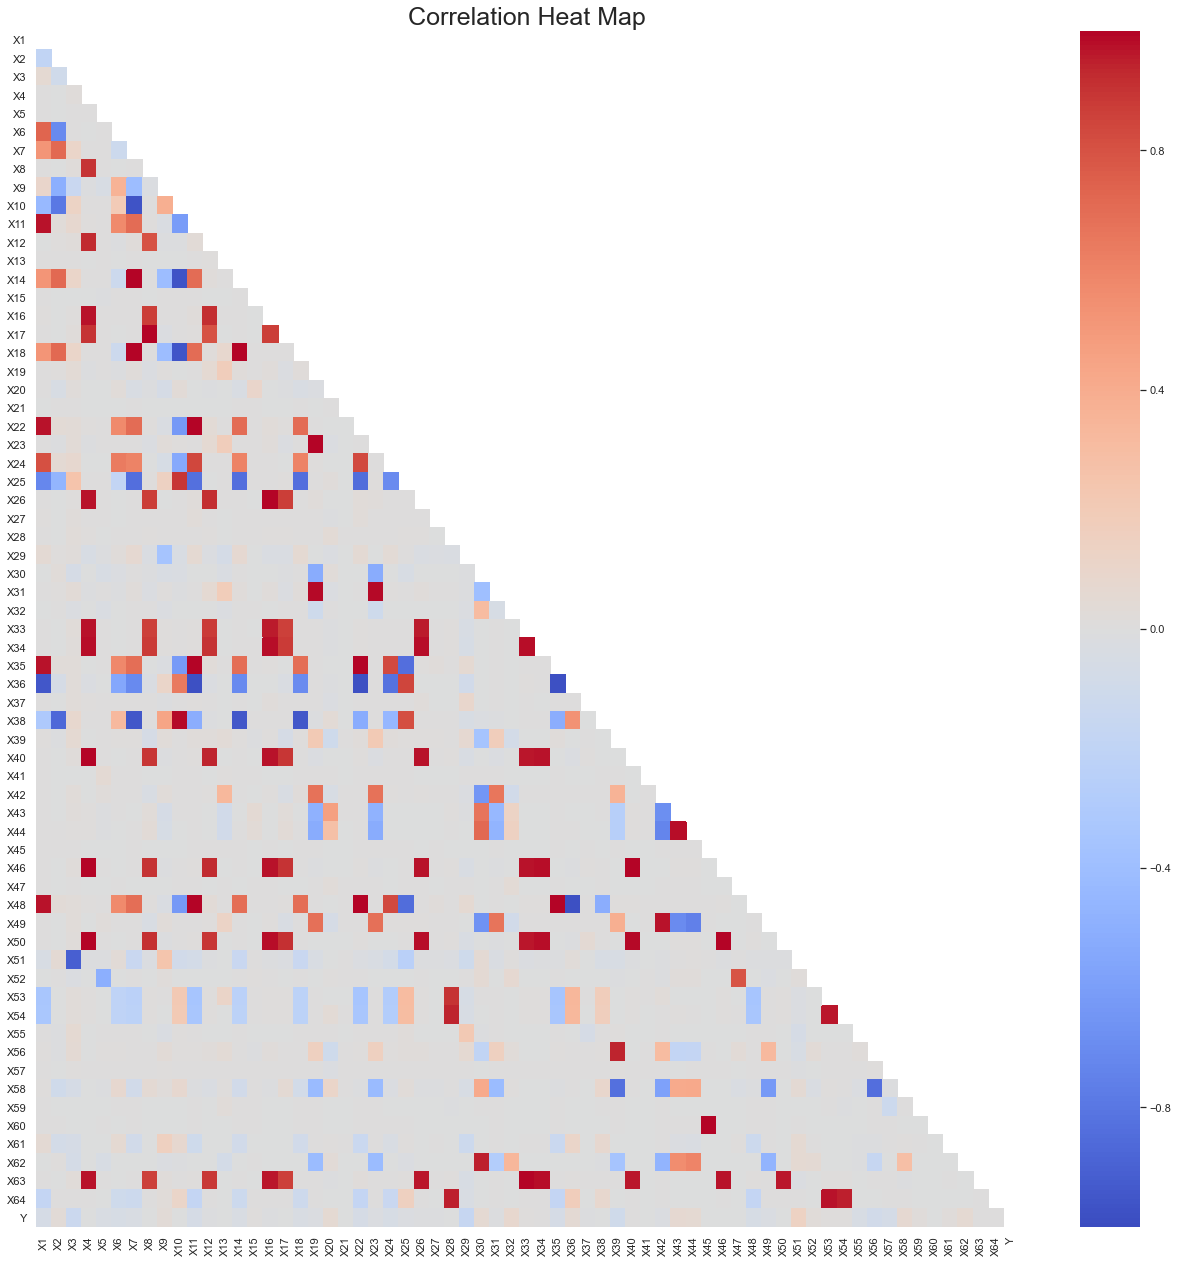

In [106]:
sns.set_style('whitegrid')
for df in dataframes:
    corr_map = df.corr()

    #extracting lower triangle of the matrix.
    mask = np.zeros_like(corr_map, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    
    #plottinh the correaltion map.
    plt.figure(figsize = (22,22))
    plt.title('Correlation Heat Map', size = 25)
    sns.heatmap(corr_map,
                vmin=-1,
                cmap='coolwarm',
                mask = mask)
    plt.show()

1. There are some features that are heavily correlated. Most of the features are independent from each other.